In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Proj1.1sub/Chessboard_00451.png')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Proj1.1sub/Chessboard_00451_1.png')
img3 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Proj1.1sub/Chessboard_00451_2.png')
img4 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Proj1.1sub/Chessboard_0481_0.png')
img5 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Proj1.1sub/Chessboard_0481_1.png')

In [ ]:
img1_g=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2_g=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
img3_g=cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
img4_g=cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
img5_g=cv.cvtColor(img5,cv.COLOR_BGR2GRAY)

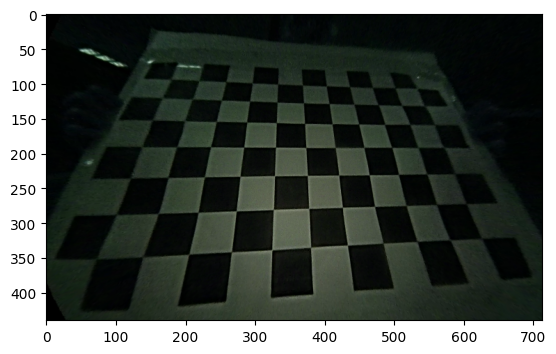

(440, 713, 3)


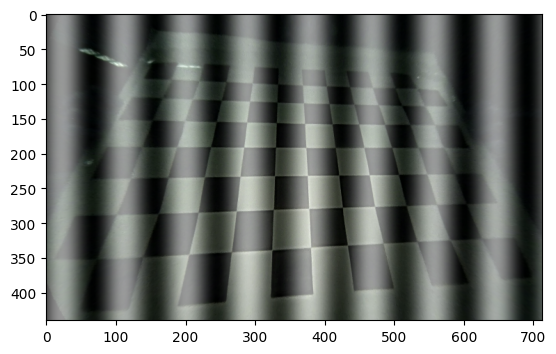

(440, 713, 3)


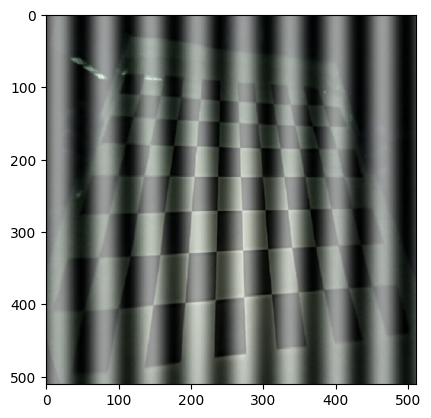

(511, 512, 3)


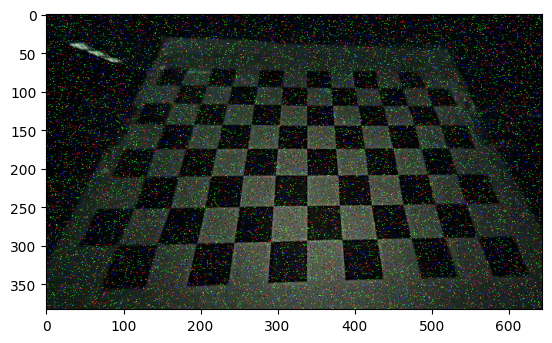

(383, 644, 3)


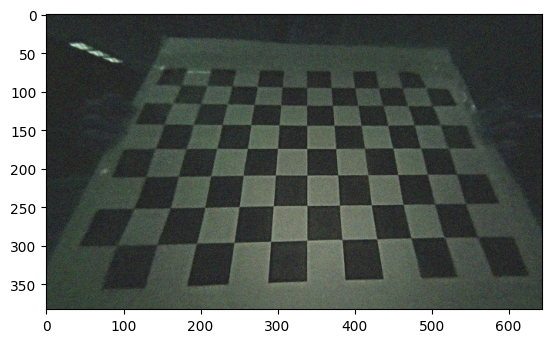

(383, 644, 3)


In [ ]:
for i in range (1,6):
  plt.imshow(eval('img'+str(i)))
  plt.show()
  print(eval('img'+str(i)).shape)

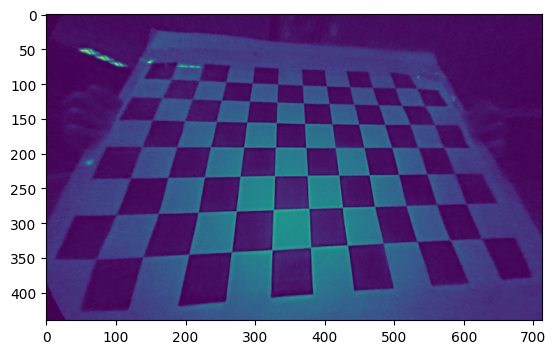

(440, 713, 3)


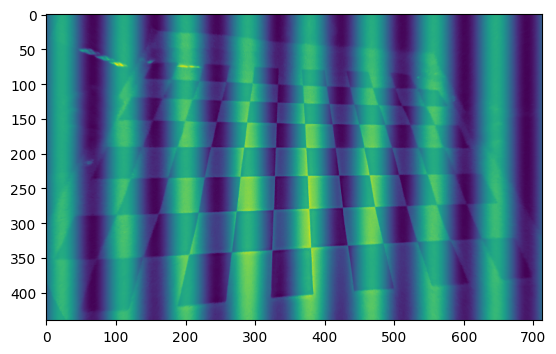

(440, 713, 3)


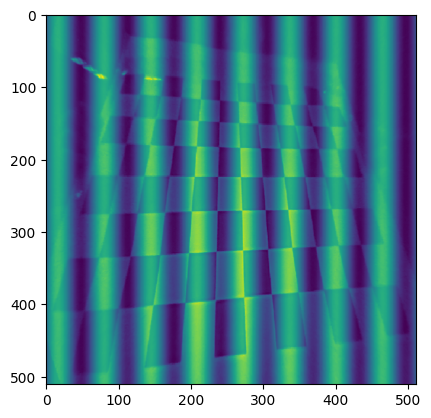

(511, 512, 3)


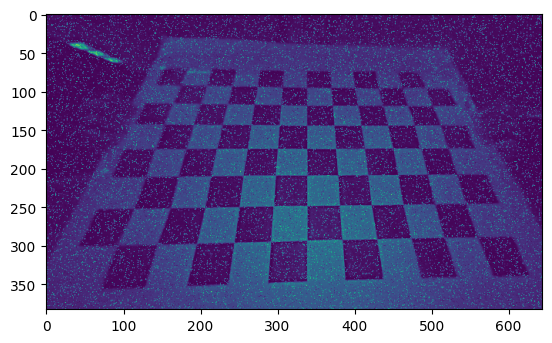

(383, 644, 3)


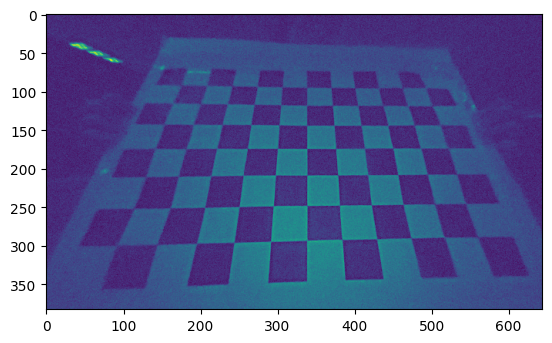

(383, 644, 3)


In [ ]:
for i in range (1,6):
  plt.imshow(eval('img'+str(i)+'_g'))
  plt.show()
  print(eval('img'+str(i)).shape)

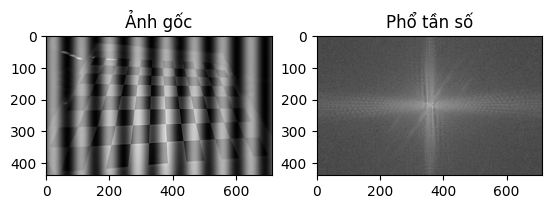

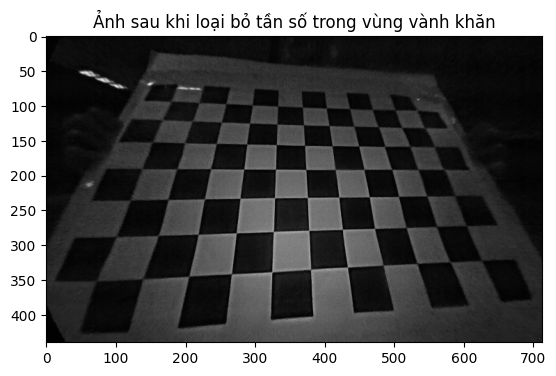

In [ ]:
#xu ly sin
def xulysin(img, r_min=20, r_max=50):
    # Biến đổi Fourier
    image = img
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Hiển thị phổ tần số
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Ảnh gốc')
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Phổ tần số')
    plt.show()

    # Lọc nhiễu: loại bỏ tần số trong vùng vành khăn
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Tìm tâm của ảnh

    # Tạo mặt nạ hình tròn
    Y, X = np.ogrid[:rows, :cols]
    distance_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)

    # Mặt nạ ban đầu là 1 (tất cả tần số đều được giữ lại)
    mask = np.ones((rows, cols, 2), np.uint8)

    # Loại bỏ các tần số trong vùng vành khăn (tần số trung gian)
    mask[(distance_from_center >= r_min) & (distance_from_center <= r_max)] = 0

    # Áp dụng mặt nạ vào phổ
    fshift = dft_shift * mask

    # Biến đổi ngược Fourier
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Chuẩn hóa và hiển thị ảnh sau khi xử lý
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # Chuyển ảnh thành kiểu uint8 trước khi hiển thị
    img_back = img_back.astype(np.uint8)

    # Hiển thị ảnh sau khi loại bỏ nhiễu
    plt.imshow(img_back, cmap='gray')
    plt.title('Ảnh sau khi loại bỏ tần số trong vùng vành khăn')
    plt.show()

    return img_back

# Giả sử `img3_g` là ảnh đầu vào của bạn
img4_sin = xulysin(img2_g, r_min=8, r_max=8)

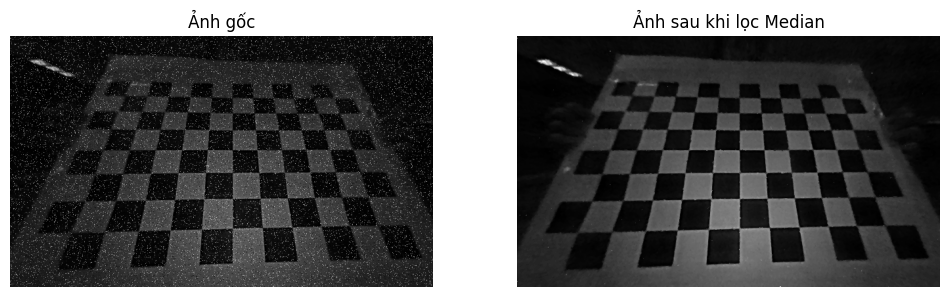

In [ ]:
#xu ly nhieu muoi tieu voi bo loc median
def xuly_median_filter(img, kernel_size=3):
    """
    Hàm xử lý ảnh bằng bộ lọc Median để loại bỏ nhiễu muối tiêu.
    :return: Ảnh sau khi xử lý với bộ lọc Median.
    """
    if img.dtype != np.uint8:
      img = np.uint8(img * 255)  # Chuyển đổi giá trị ảnh về phạm vi [0, 255] và kiểu dữ liệu uint8

    # Áp dụng bộ lọc Median
    img_filtered = cv2.medianBlur(img, kernel_size)

    # Hiển thị ảnh gốc và ảnh sau khi xử lý
    plt.figure(figsize=(12, 6))

    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')

    # Ảnh sau khi lọc Median
    plt.subplot(1, 2, 2)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Ảnh sau khi lọc Median')
    plt.axis('off')

    # Hiển thị các hình ảnh
    plt.show()

    return img_filtered

# Gọi hàm xử lý ảnh với Median Filter
result_img = xuly_median_filter(img4_sin, kernel_size=3)

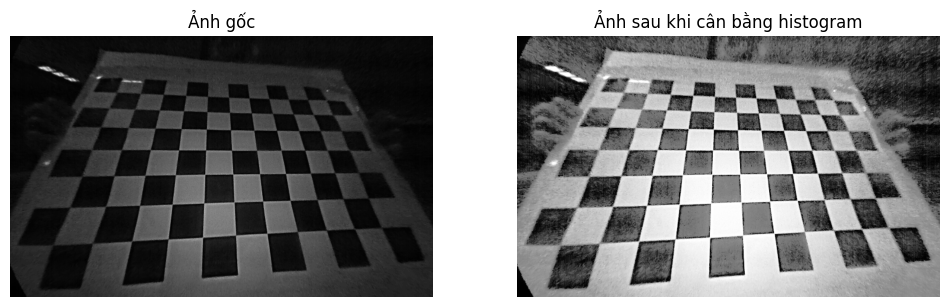

In [ ]:
#tang do tuong phan cua anh bang histogram
def histogram_equalization(img):
    # Cân bằng histogram (cho ảnh grayscale)
    img_eq = cv2.equalizeHist(img)

    # Hiển thị ảnh gốc và ảnh đã cân bằng histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_eq, cmap='gray')
    plt.title('Ảnh sau khi cân bằng histogram')
    plt.axis('off')

    plt.show()

    return img_eq

# Đọc ảnh
result_img = histogram_equalization(img4_sin)

In [ ]:
# Hàm chuẩn hóa ảnh
def chuan_hoa_anh(img):
    normalized_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return np.uint8(normalized_img)

# Hàm chuyển ảnh về nhị phân
def chuyen_ve_nhi_phan(img, threshold_value=127):
    _, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_img

In [ ]:
#tang do tuong phan bang ham gamma
def gamma_correction(img, gamma=1.2):
    """
    Hàm tăng cường độ tương phản bằng cách áp dụng Gamma Correction.

    Parameters:
        img (numpy.ndarray): Ảnh đầu vào (grayscale hoặc ảnh màu).
        gamma (float): Chỉ số gamma, điều chỉnh độ sáng (gamma < 1 làm sáng ảnh, gamma > 1 làm tối ảnh).

    Returns:
        img_gamma (numpy.ndarray): Ảnh sau khi áp dụng Gamma Correction.
    """
    # Kiểm tra xem ảnh có phải là ảnh grayscale hoặc ảnh màu
    if len(img.shape) != 2 and len(img.shape) != 3:
        raise ValueError("Ảnh đầu vào phải là ảnh grayscale hoặc ảnh màu")

    # Tạo bảng tra cứu gamma cho ảnh grayscale
    lookup_table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)], dtype="uint8")

    # Áp dụng gamma correction cho từng pixel trong ảnh
    if len(img.shape) == 2:  # Ảnh grayscale
        img_gamma = cv2.LUT(img, lookup_table)
    elif len(img.shape) == 3:  # Ảnh màu (RGB)
        img_gamma = np.zeros_like(img)
        for i in range(3):  # Xử lý từng kênh màu (Red, Green, Blue)
            img_gamma[:, :, i] = cv2.LUT(img[:, :, i], lookup_table)

    # Hiển thị ảnh gốc và ảnh sau khi điều chỉnh gamma
    plt.figure(figsize=(12, 6))

    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')

    # Ảnh sau khi điều chỉnh gamma
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img_gamma, cmap='gray')
    plt.title('Ảnh sau khi điều chỉnh gamma')
    plt.axis('off')

    plt.show()

    return img_gamma


# Tăng cường độ tương phản cho ảnh bằng gamma correction
result_img = gamma_correction(img4_sin, gamma=0.83)  # Thử gamma = 1.2 để làm ảnh sáng hơn


Đang xử lý img1_g


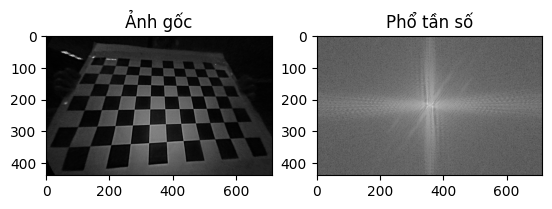

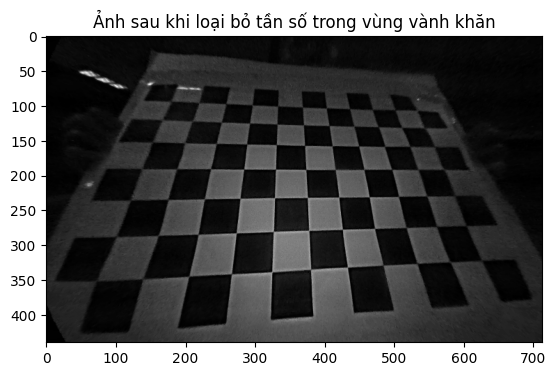

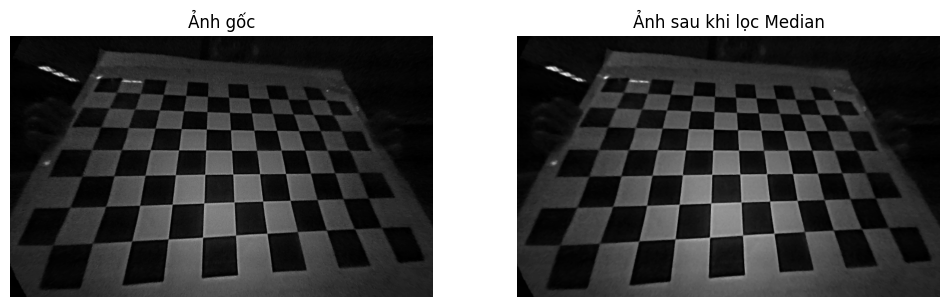

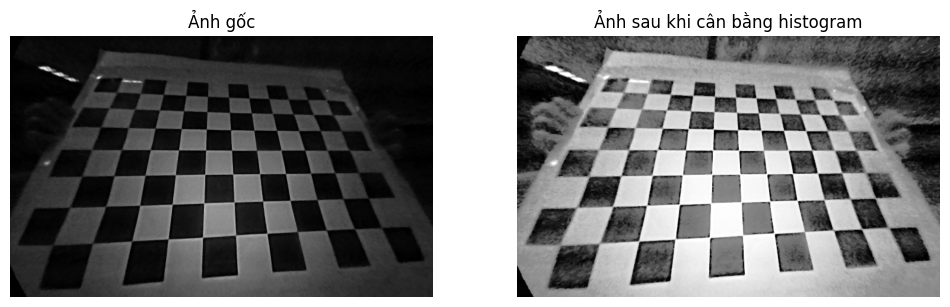

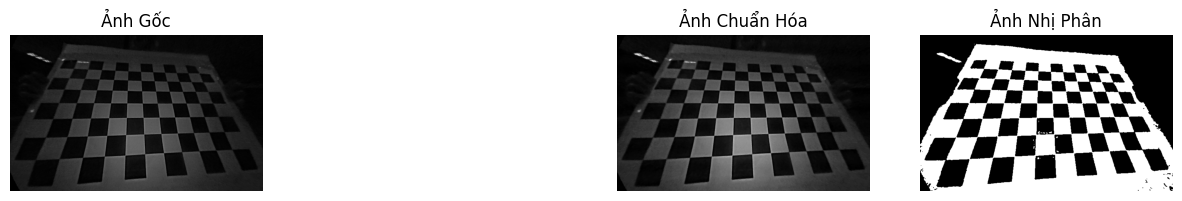

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'Sobel'


In [ ]:
# Hàm xử lý ảnh với các bước chuẩn hóa, lọc, và biến đổi
def xulyanh(img):
    img_g = img  # Ảnh đầu vào

    # Giả sử bạn có các hàm như xulysin, xuly_median_filter, histogram_equalization, gamma_correction
    # Cần đảm bảo những hàm này được định nghĩa hoặc cài đặt đúng trước khi sử dụng.
    img_sin = xulysin(img_g, r_min=8, r_max=8)  # Giả sử xử lý sin (mẫu chưa có hàm xulysin)
    img_median = xuly_median_filter(img_sin, kernel_size=3)  # Áp dụng median filter
    img_normalized = chuan_hoa_anh(img_median)  # Chuẩn hóa giá trị về 0-255
    img_histo = histogram_equalization(img_normalized)  # Cân bằng histogram
    img_binary = chuyen_ve_nhi_phan(img_histo,threshold_value=135)  # Chuyển sang ảnh nhị phân

    # Hiển thị ảnh gốc và ảnh sau xử lý
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title("Ảnh Gốc")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Ảnh Chuẩn Hóa")
    plt.imshow(img_normalized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Ảnh Nhị Phân")
    plt.imshow(img_binary, cmap='gray')
    plt.axis('off')


    plt.show()
def sobel_edge_detection_binary(img):
    # Ảnh đã là nhị phân (0 và 255), không cần chuyển đổi sang grayscale
    # Áp dụng bộ lọc Sobel để tính gradient theo chiều ngang (x) và chiều dọc (y)
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient theo chiều ngang
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient theo chiều dọc

    # Tính toán magnitude của gradient (cạnh tổng hợp)
    magnitude = cv2.magnitude(grad_x, grad_y)

    # Chuyển đổi magnitude về dạng uint8 để hiển thị
    magnitude = np.uint8(np.absolute(magnitude))

    # Có thể sử dụng ngưỡng (threshold) để làm ảnh rõ hơn (ngưỡng ở đây là 100)
    _, thresholded_img = cv2.threshold(magnitude, 100, 255, cv2.THRESH_BINARY)

    return thresholded_img

for i in range(1, 6):
    img_name = f'img{i}_g'  # Tạo tên ảnh: img1_g, img2_g, ...
    img = globals().get(img_name)  # Truy cập biến img1_g, img2_g, ...
    if img is not None:
        print(f"Đang xử lý {img_name}")
        tk=xulyanh(img)  # Áp dụng xử lý ảnh
        inra=sobel_edge_detection_binary(tk)
        plt.imshow(inra, cmap='gray')
        plt.show()
    else:
        print(f"Không tìm thấy ảnh {img_name}")